In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling libraries
# To be decided

# Allow multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/advertising_dsdj.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
Daily Time Spent on Site    1018 non-null float64
Age                         1018 non-null int64
Area Income                 1018 non-null float64
Daily Internet Usage        1018 non-null float64
Ad Topic Line               1018 non-null object
City                        1018 non-null object
Male                        1018 non-null int64
Country                     1018 non-null object
Timestamp                   1018 non-null object
Clicked on Ad               1014 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.7+ KB


In [4]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad               float64
dtype: object

## EDA

In [5]:
df.shape

(1018, 10)

In [6]:
df = df.dropna()

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,65.043481,36.915187,54928.970631,179.372682,0.480276,0.500986
std,15.862481,31.625753,13431.891417,44.462916,0.499857,0.500246
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.410000,29.000000,46939.300000,138.527500,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,182.650000,0.000000,1.000000
75%,78.577500,42.000000,65267.402500,218.207500,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


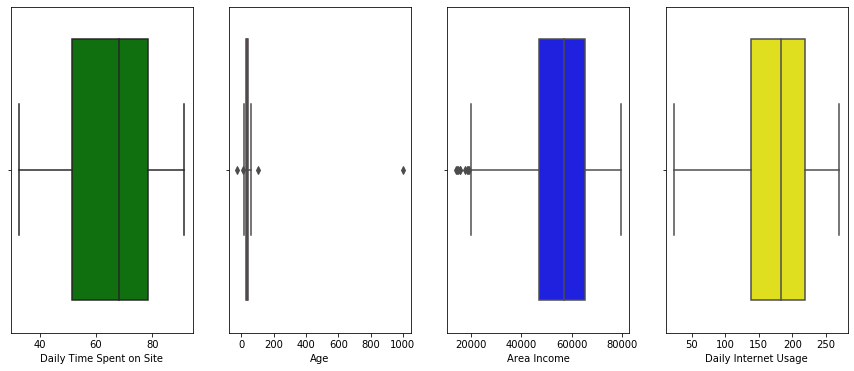

In [8]:
f, axes = plt.subplots(ncols=4, figsize=(15, 6))
sns.boxplot(df['Daily Time Spent on Site'], color="green", ax=axes[0])
sns.boxplot(df['Age'], color="red", ax=axes[1])
sns.boxplot(df['Area Income'], color="blue", ax=axes[2])
sns.boxplot(df['Daily Internet Usage'], color="yellow", ax=axes[3])

As we can see, in 'Age' feature we have 4 outliers (-25, 8, 103 and 999). We will drop those observations from the dataframe.

In [9]:
df = df[~df['Age'].isin([-25,8,103,999])]

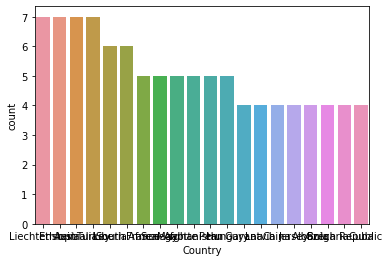

In [10]:
df_1 = df[df['Clicked on Ad'] == 1]
sns.countplot(df_1['Country'], order=df_1['Country'].value_counts()[:20].index)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.334241,0.312276,0.509839,-0.021566,-0.748331
Age,-0.334241,1.000000,-0.186230,-0.367430,-0.016442,0.495064
Area Income,0.312276,-0.186230,1.000000,0.342945,-0.003139,-0.476075
Daily Internet Usage,0.509839,-0.367430,0.342945,1.000000,0.018342,-0.777500
Male,-0.021566,-0.016442,-0.003139,0.018342,1.000000,-0.035750
Clicked on Ad,-0.748331,0.495064,-0.476075,-0.777500,-0.035750,1.000000


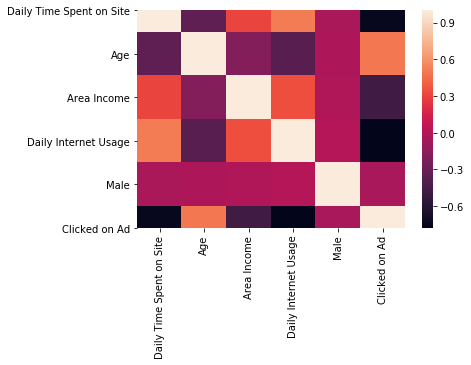

In [11]:
corr = df.corr()
sns.heatmap(corr)
corr

Plot features if male and if not male.